# Recurrent Neural Networks (RNN)

Let's try a simple RNN model.

First, we import the necessary libraries, including the code we have written for the RNN model.

In [1]:
import json
import numpy as np
from rnn import load_data, train_rnn, evaluate_rnn

Then, we load the data.

In [2]:
with open('../data/NewsMTSC-dataset/train_preprocessed.jsonl', 'r') as f:
    train_data = [json.loads(line) for line in f]

with open('../data/NewsMTSC-dataset/devtest_mt_preprocessed.jsonl', 'r') as f:
    devtest_mt_data = [json.loads(line) for line in f]

with open('../data/NewsMTSC-dataset/devtest_rw_preprocessed.jsonl', 'r') as f:
    devtest_rw_data = [json.loads(line) for line in f]

print('train_data:', len(train_data))
print('devtest_mt_data:', len(devtest_mt_data))
print('devtest_rw_data:', len(devtest_rw_data))

print('train_data[0]:', train_data[0])
print('devtest_mt_data[0]:', devtest_mt_data[0])
print('devtest_rw_data[0]:', devtest_rw_data[0])

train_data: 8739
devtest_mt_data: 1476
devtest_rw_data: 1146
train_data[0]: {'gid': 'allsides_1000_401_25_Reality Leigh Winner_0_6', 'sentence_normalized': 'Winner wrote 30minute private meeting Republican lawmakers state policy director', 'polarity': 4.0}
devtest_mt_data[0]: {'gid': 'allsides_1002_402_12_former FBI director James B. Comey_51_56', 'sentence_normalized': 'While White House officials said days Comeys dismissal largely result memo written Deputy Attorney General Rod J Rosenstein criticizing FBI directors handling investigation Hillary Clintons use private email server secretary state Trump suggested NBC interview Russian investigation played role decision', 'polarity': 2.0}
devtest_rw_data[0]: {'gid': 'allsides_703_283_55_Mr. Trump_124_133', 'sentence_normalized': 'A group congressional Democrats said Wednesday ask Congress take rare step officially censuring Mr Trump', 'polarity': 2.0}


In [3]:
text_data, labels = load_data(train_data)
text_data_mt, labels_mt = load_data(devtest_mt_data)
text_data_rw, labels_rw = load_data(devtest_rw_data)

Then we train a baseline model.

Device: cuda
Epoch 1, Loss: 1.0892314541078831
Epoch 2, Loss: 1.0432761224516987
Epoch 3, Loss: 0.7819230739217605
Epoch 4, Loss: 0.5361267609426575
Epoch 5, Loss: 0.38209393207174147
Epoch 6, Loss: 0.28147954229999633
Epoch 7, Loss: 0.21820341956115116
Epoch 8, Loss: 0.17935917306908944
Epoch 9, Loss: 0.15299380303829582
Epoch 10, Loss: 0.1396568835569362
Epoch 11, Loss: 0.1318356920931026
Epoch 12, Loss: 0.1250429525066432
Epoch 13, Loss: 0.12002167209343863
Epoch 14, Loss: 0.11729268450459913
Epoch 15, Loss: 0.11330839479342103
Epoch 16, Loss: 0.11357964347388567
Epoch 17, Loss: 0.11215607259918793
Epoch 18, Loss: 0.112420269602529
Epoch 19, Loss: 0.10781115853485998
Epoch 20, Loss: 0.10476288812177215


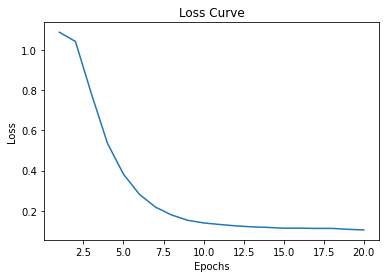

In [4]:
epochs = 20
hidden_dim = 128
num_layers = 3
learning_rate = 0.0001
model, vectorizer = train_rnn(text_data, labels, epochs, hidden_dim, num_layers, learning_rate)

Finally, we evaluate the model on the test datasets.

In [5]:
print("Train data classification report:")
accuracy, roc_auc, report = evaluate_rnn(model, vectorizer, text_data, labels)

print("Devtest MT data classification report:")
accuracy_mt, roc_auc_mt, report_mt = evaluate_rnn(model, vectorizer, text_data_mt, labels_mt)

print("Devtest RW data classification report:")
accuracy_rw, roc_auc_rw, report_rw = evaluate_rnn(model, vectorizer, text_data_rw, labels_rw)

Train data classification report:
Classification Report:
{'0': {'precision': 0.9452824608104111, 'recall': 0.9638118214716526, 'f1-score': 0.9544572196505898, 'support': 3316}, '1': {'precision': 0.9323284156510584, 'recall': 0.9600396301188904, 'f1-score': 0.9459811259355678, 'support': 3028}, '2': {'precision': 0.9946428571428572, 'recall': 0.9302713987473904, 'f1-score': 0.9613807982740022, 'support': 2395}, 'accuracy': 0.9533127360109852, 'macro avg': {'precision': 0.9574179112014422, 'recall': 0.9513742834459777, 'f1-score': 0.9539397146200533, 'support': 8739}, 'weighted avg': {'precision': 0.9543216301059471, 'recall': 0.9533127360109852, 'f1-score': 0.9534177825335268, 'support': 8739}}
Accuracy: 0.9533
ROC-AUC: 0.9977
Devtest MT data classification report:
Classification Report:
{'0': {'precision': 0.5207296849087893, 'recall': 0.6514522821576764, 'f1-score': 0.5788018433179724, 'support': 482}, '1': {'precision': 0.6616989567809239, 'recall': 0.5935828877005348, 'f1-score': 0

Let's what the report looks like.

In [6]:
report_rw

{'0': {'precision': 0.578125,
  'recall': 0.6037296037296037,
  'f1-score': 0.5906499429874573,
  'support': 429},
 '1': {'precision': 0.5265225933202358,
  'recall': 0.589010989010989,
  'f1-score': 0.5560165975103736,
  'support': 455},
 '2': {'precision': 0.4708994708994709,
  'recall': 0.33969465648854963,
  'f1-score': 0.3946784922394679,
  'support': 262},
 'accuracy': 0.537521815008726,
 'macro avg': {'precision': 0.5251823547399023,
  'recall': 0.5108117497430474,
  'f1-score': 0.5137816775790996,
  'support': 1146},
 'weighted avg': {'precision': 0.5331230945343531,
  'recall': 0.537521815008726,
  'f1-score': 0.532096110275375,
  'support': 1146}}

Okay, it includes all the results we want to see except for the ROC-AUC score. We can add that to this report so that we have all the results in one place. 

In [7]:
report['roc_auc'] = roc_auc
report_mt['roc_auc'] = roc_auc_mt
report_rw['roc_auc'] = roc_auc_rw

Now, let's create a master dictionary that will have details about the model (type and hyperparameters), and the reported results from all three datasets splits.

In [8]:
result = dict()
result['model'] = {'type': 'RNN', 'hidden_dim': hidden_dim, 'num_layers': num_layers, 'learning_rate': learning_rate}
result['train'] = report
result['devtest_mt'] = report_mt
result['devtest_rw'] = report_rw

We get 95.3% on the training dataset but 55.6% on the mt dataset and 54.0% on the rw dataset. There is a significant difference between the performance on the training dataset and the test datasets. This could be due to overfitting, or the model is not learning the right features. We can try to improve the model by tuning the hyperparameters (epochs, le), modifying the architecture, or changing the distribution of the datasets. For the sake of this project, we will try to improve models by tuning the hyperparameters.

## Hyperparameter tuning

Let's try to tune the hyperparameters of the model to improve the performance. We will run experiments and compare the results.

We will tune the following hyperparameters:
- Learning rate
- Number of epochs
- Hidden units
- Number of layers

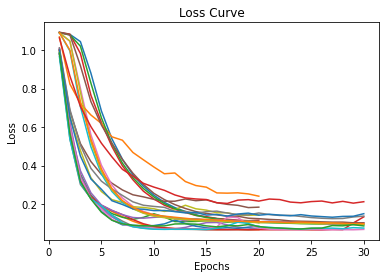

In [11]:
# Suppress output
import contextlib
import matplotlib
matplotlib.use('Agg')
with contextlib.redirect_stdout(open('/dev/null', 'w')):

    epochs_list = [20, 30]
    hidden_dim_list = [64, 128]
    num_layers_list = [3, 4]
    learning_rate_list = [0.0001, 0.001, 0.01]

    results = []

    for epochs in epochs_list:
        for hidden_dim in hidden_dim_list:
            for num_layers in num_layers_list:
                for learning_rate in learning_rate_list:
                    print(f"Training with epochs={epochs}, hidden_dim={hidden_dim}, num_layers={num_layers}, learning_rate={learning_rate}")
                    model, vectorizer = train_rnn(text_data, labels, epochs, hidden_dim, num_layers, learning_rate)
                    accuracy, roc_auc, report = evaluate_rnn(model, vectorizer, text_data, labels)
                    accuracy_mt, roc_auc_mt, report_mt = evaluate_rnn(model, vectorizer, text_data_mt, labels_mt)
                    accuracy_rw, roc_auc_rw, report_rw = evaluate_rnn(model, vectorizer, text_data_rw, labels_rw)
                    report['roc_auc'] = roc_auc
                    report_mt['roc_auc'] = roc_auc_mt
                    report_rw['roc_auc'] = roc_auc_rw
                    result = dict()
                    result['model'] = {'type': 'RNN', 'hidden_dim': hidden_dim, 'num_layers': num_layers, 'learning_rate': learning_rate}
                    result['train'] = report
                    result['devtest_mt'] = report_mt
                    result['devtest_rw'] = report_rw
                    results.append(result)

We will write the results of the experiments in a json file, where each entry looks like the following:
    
    ```json
    {
        "model": {
            "type": [model_type],
            "hidden_dim": [hidden_dim],
            "num_layers": [n_layers],
            "learning_rate": [lr],
        },
        "train": {
            "accuracy": [train_acc],
            "roc_auc": [train_roc_auc]
            "0": {
                "precision": [train_precision_0],
                "recall": [train_recall_0],
                "f1": [train_f1_0],
                "support": [train_support_0]
            },
            "1": {
                "precision": [train_precision_1],
                "recall": [train_recall_1],
                "f1": [train_f1_1],
                "support": [train_support_1]
            },
            "2": {
                "precision": [train_precision_2],
                "recall": [train_recall_2],
                "f1": [train_f1_2],
                "support": [train_support_2]
            }
        },
        "devtest_mt": {
            "accuracy": [devtest_mt_acc],
            "roc_auc": [devtest_mt_roc_auc]
            "0": {
                "precision": [devtest_mt_precision_0],
                "recall": [devtest_mt_recall_0],
                "f1": [devtest_mt_f1_0],
                "support": [devtest_mt_support_0]
            },
            "1": {
                "precision": [devtest_mt_precision_1],
                "recall": [devtest_mt_recall_1],
                "f1": [devtest_mt_f1_1],
                "support": [devtest_mt_support_1]
            },
            "2": {
                "precision": [devtest_mt_precision_2],
                "recall": [devtest_mt_recall_2],
                "f1": [devtest_mt_f1_2],
                "support": [devtest_mt_support_2]
            }
        },
        "devtest_rw": {
            "accuracy": [devtest_rw_acc],
            "roc_auc": [devtest_rw_roc_auc]
            "0": {
                "precision": [devtest_rw_precision_0],
                "recall": [devtest_rw_recall_0],
                "f1": [devtest_rw_f1_0],
                "support": [devtest_rw_support_0]
            },
            "1": {
                "precision": [devtest_rw_precision_1],
                "recall": [devtest_rw_recall_1],
                "f1": [devtest_rw_f1_1],
                "support": [devtest_rw_support_1]
            },
            "2": {
                "precision": [devtest_rw_precision_2],
                "recall": [devtest_rw_recall_2],
                "f1": [devtest_rw_f1_2],
                "support": [devtest_rw_support_2]
            }
        }
    }
    ```

In [12]:
with open('rnn_results.json', 'w') as f:
    json.dump(results, f, indent=4)